In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mapclassify
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [25]:
dtypes_dict = {
 'FIPS': 'object',
 'State': 'object',
 'County': 'object',
 'Deaths': 'float64',
 'Years of Potential Life Lost Rate': 'float64',
 '% Fair or Poor Health': 'float64',
 'Average Number of Physically Unhealthy Days': 'float64',
 'Average Number of Mentally Unhealthy Days': 'float64',
 '% Low birthweight': 'float64',
 '% Smokers': 'float64',
 '% Adults with Obesity': 'float64',
 'Food Environment Index': 'float64',
 '% Physically Inactive': 'float64',
 '% With Access to Exercise Opportunities': 'float64',
 '% Excessive Drinking': 'float64',
 '# Alcohol-Impaired Driving Deaths': 'float64',
 '# Driving Deaths': 'float64',
 '% Driving Deaths with Alcohol Involvement': 'float64',
 '# Chlamydia Cases': 'float64',
 'Chlamydia Rate': 'float64',
 'Teen Birth Rate': 'float64',
 '# Uninsured': 'float64',
 '% Uninsured': 'float64',
 '# Primary Care Physicians': 'float64',
 'Primary Care Physicians Rate': 'float64',
 'Primary Care Physicians Ratio': 'object',
 '# Dentists': 'float64',
 'Dentist Rate': 'float64',
 'Dentist Ratio': 'object',
 '# Mental Health Providers': 'float64',
 'Mental Health Provider Rate': 'float64',
 'Mental Health Provider Ratio': 'object',
 'Preventable Hospitalization Rate': 'float64',
 '% With Annual Mammogram': 'float64',
 '% Vaccinated': 'float64',
 '# Completed High School': 'int64',
 'Population': 'int64',
 '% Completed High School': 'float64',
 '# Some College': 'int64',
 'Population.1': 'int64',
 '% Some College': 'float64',
 '# Unemployed': 'float64',
 'Labor Force': 'float64',
 '% Unemployed': 'float64',
 '% Children in Poverty': 'float64',
 'Income Ratio': 'float64',
 '# Children in Single-Parent Households': 'float64',
 '# Children in Households': 'float64',
 '% Children in Single-Parent Households': 'float64',
 '# Associations': 'int64',
 'Social Association Rate': 'float64',
 'Annual Average Violent Crimes': 'float64',
 'Violent Crime Rate': 'float64',
 '# Injury Deaths': 'float64',
 'Injury Death Rate': 'float64',
 'Average Daily PM2.5': 'float64',
 '% Severe Housing Problems': 'float64',
 'Severe Housing Cost Burden': 'float64',
 'Overcrowding': 'float64',
 'Inadequate Facilities': 'float64',
 '% Drive Alone to Work': 'float64',
 '# Workers who Drive Alone': 'int64',
 '% Long Commute - Drives Alone': 'float64',
 'Water_Violation': 'int64'}

In [26]:
shapefile_path = '../data/counties.shp'
geo = gpd.read_file(shapefile_path)

demo = pd.read_csv('../data/demo_with_clusters.csv', dtype=dtypes_dict)

In [24]:
type(geo.head())

geopandas.geodataframe.GeoDataFrame

In [5]:
geo.dtypes

STATE           object
CWA             object
COUNTYNAME      object
FIPS            object
TIME_ZONE       object
FE_AREA         object
LON            float64
LAT            float64
geometry      geometry
dtype: object

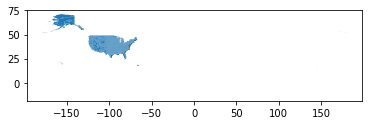

In [6]:
geo.plot();

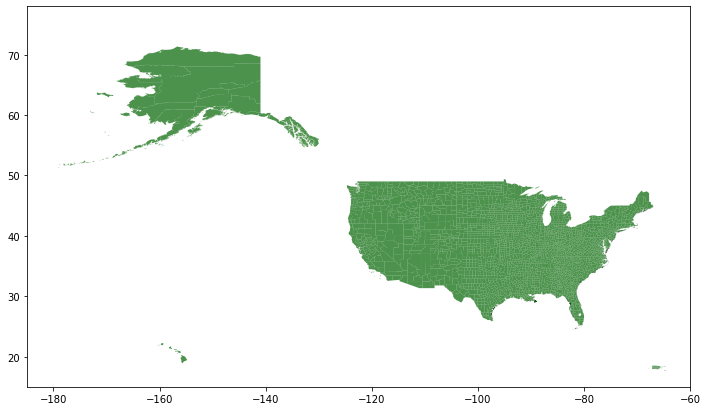

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
geo.plot(ax=ax,
         color='darkgreen',
         alpha=.7)
ax.set_xlim([-185,-60])
ax.set_ylim([15, 78]);

In [30]:
gdf = geo.merge(demo, how='right', left_on='FIPS', right_on='FIPS')

In [31]:
gdf.dtypes

STATE                                            0
CWA                                              0
COUNTYNAME                                       0
FIPS                                             0
TIME_ZONE                                        0
FE_AREA                                         26
LON                                              0
LAT                                              0
geometry                                         0
index                                            0
State                                            0
County                                           0
% Fair or Poor Health                            0
Average Number of Physically Unhealthy Days      0
Average Number of Mentally Unhealthy Days        0
% Low birthweight                                0
% Smokers                                        0
% Adults with Obesity                            0
% Physically Inactive                            0
% With Access to Exercise Oppor

In [32]:
states = gdf.dissolve(by='STATE')
states.reset_index(inplace=True)
states

STATE                                           geometry  CWA  \
0     AK  MULTIPOLYGON (((-130.72002 54.75873, -130.7187...  AFC   
1     AL  MULTIPOLYGON (((-87.87930 30.71449, -87.87942 ...  BMX   
2     AR  MULTIPOLYGON (((-90.95540 34.11951, -90.95049 ...  LZK   
3     AZ  POLYGON ((-109.04760 32.42641, -109.04829 32.0...  FGZ   
4     CA  MULTIPOLYGON (((-114.62710 33.43371, -114.6302...  MTR   
5     CO  POLYGON ((-102.04160 37.64431, -102.04160 37.6...  BOU   
6     CT  MULTIPOLYGON (((-73.62247 40.98430, -73.62167 ...  OKX   
7     DC  MULTIPOLYGON (((-77.05970 38.89221, -77.06120 ...  LWX   
8     DE  MULTIPOLYGON (((-75.13614 38.64211, -75.13740 ...  PHI   
9     FL  MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ...  JAX   
10    GA  MULTIPOLYGON (((-83.31560 30.63561, -83.32079 ...  JAX   
11    HI  MULTIPOLYGON (((-156.00850 19.63814, -156.0084...  HFO   
12    IA  POLYGON ((-91.11279 40.69631, -91.11539 40.691...  DMX   
13    ID  POLYGON ((-111.04670 42.51351, -111.04700 42.4...  BOI   
14    IL  POLYGON ((-89.24529 37.33241, -89.23720 37.331...  LSX   
15    IN  POLYGON ((-86.81319 37.99921, -86.81830 37.999...  IWX   
16    KS  MULTIPOLYGON (((-94.61790 37.33761, -94.61760 ...  ICT   
17    KY  MULTIPOLYGON (((-89.48499 36.49781, -89.49899 ...  LMK   
18    LA  MULTIPOLYGON (((-89.41367 28.92076, -89.41422 ...  LCH   
19    MA  MULTIPOLYGON (((-70.81094 41.26176, -70.81018 ...  BOX   
20    MD  MULTIPOLYGON (((-75.88359 37.90867, -75.88402 ...  LWX   
21    ME  MULTIPOLYGON (((-70.42468 43.36591, -70.42200 ...  GYX   
22    MI  MULTIPOLYGON (((-83.44681 41.78348, -83.44713 ...  APX   
23    MN  MULTIPOLYGON (((-91.28519 43.84721, -91.27859 ...  DLH   
24    MO  POLYGON ((-89.54510 36.33681, -89.56039 36.337...  EAX   
25    MS  MULTIPOLYGON (((-88.62128 30.35913, -88.62421 ...  JAN   
26    MT  MULTIPOLYGON (((-111.06250 46.19331, -111.0594...  TFX   
27    NC  MULTIPOLYGON (((-78.52554 33.85993, -78.52340 ...  RAH   
28    ND  MULTIPOLYGON (((-98.31460 46.28301, -98.27270 ...  FGF   
29    NE  MULTIPOLYGON (((-95.55220 40.26171, -95.54720 ...  GID   
30    NH  POLYGON ((-70.96322 43.54029, -70.96300 43.535...  GYX   
31    NJ  MULTIPOLYGON (((-74.74543 39.12018, -74.74590 ...  PHI   
32    NM  POLYGON ((-106.37650 32.00131, -106.39429 32.0...  ABQ   
33    NV  POLYGON ((-114.05060 36.84308, -114.05030 36.7...  REV   
34    NY  MULTIPOLYGON (((-74.07838 40.64860, -74.07588 ...  ALY   
35    OH  MULTIPOLYGON (((-82.28870 38.58151, -82.29179 ...  ILN   
36    OK  MULTIPOLYGON (((-98.66199 34.40601, -98.66170 ...  TSA   
37    OR  MULTIPOLYGON (((-124.42383 42.46447, -124.4243...  BOI   
38    PA  MULTIPOLYGON (((-74.97459 40.04871, -74.97960 ...  CTP   
39    RI  MULTIPOLYGON (((-71.56863 41.22551, -71.56779 ...  BOX   
40    SC  MULTIPOLYGON (((-80.88942 32.03780, -80.89009 ...  GSP   
41    SD  MULTIPOLYGON (((-96.45440 43.08351, -96.45570 ...  FSD   
42    TN  MULTIPOLYGON (((-84.29230 35.20671, -84.29390 ...  MRX   
43    TX  MULTIPOLYGON (((-97.19970 25.99932, -97.19998 ...  FWD   
44    UT  POLYGON ((-109.05340 39.49761, -109.05130 39.4...  SLC   
45    VA  MULTIPOLYGON (((-75.88145 36.55425, -75.88165 ...  AKQ   
46    VT  POLYGON ((-72.43380 43.23371, -72.43500 43.229...  BTV   
47    WA  MULTIPOLYGON (((-117.03989 46.42581, -117.0375...  OTX   
48    WI  MULTIPOLYGON (((-87.81677 42.59232, -87.81697 ...  ARX   
49    WV  POLYGON ((-80.86000 37.42971, -80.86310 37.424...  RLX   
50    WY  POLYGON ((-107.91920 41.00201, -107.97030 41.0...  CYS   

              COUNTYNAME   FIPS TIME_ZONE FE_AREA       LON      LAT  index  \
0              Anchorage  02020         A    None -149.1067  61.1501     69   
1                Autauga  01001         C      cc  -86.6428  32.5349      0   
2               Arkansas  05001         C      se  -91.3749  34.2908    111   
3                 Apache  04001        Mm      ne -109.4888  35.3957     96   
4                Alameda  06001         P      nn -121.8860  37.6466   

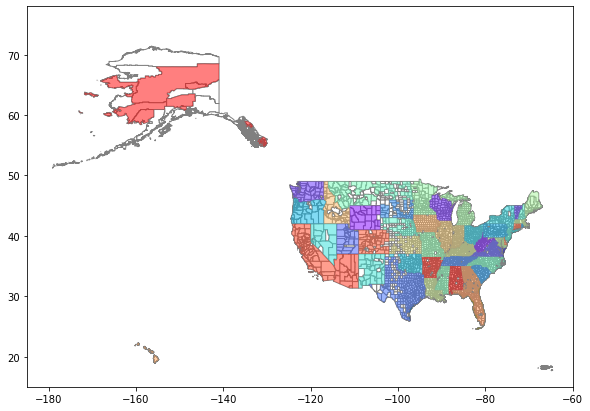

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
geo.plot(ax=ax,
         color='white',
         edgecolor='grey')
ax.set_xlim([-185,-60])
ax.set_ylim([15, 78])

states.plot(ax=ax,
            cmap='rainbow_r',
            alpha=.5,
            column='STATE');


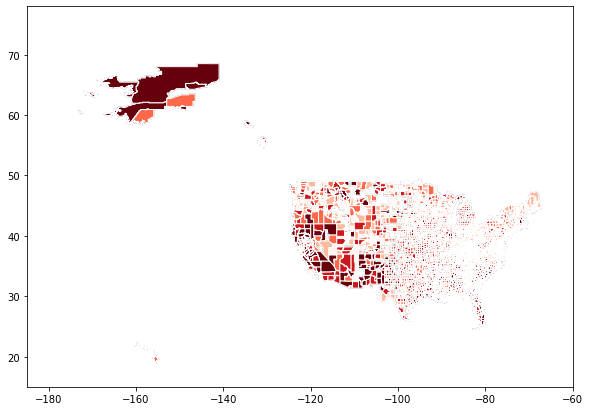

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))
gdf.plot(ax=ax,
         color='white',
         edgecolor='grey')
ax.set_xlim([-185,-60])
ax.set_ylim([15, 78])

gdf.plot(column='Violent Crime Rate',
               cmap='Reds', 
               ax=ax, 
               scheme='quantiles',
               edgecolor='white');